In [1]:
import math

import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt, rcParams
from numpy import percentile
from sklearn import linear_model, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

file_stats = pd.read_csv("data/stats.csv")

file_stats

,path,old_commit,old_nloc,old_token_count,old_avg_token_count,old_avg_nloc,old_avg_cyclo_comp,old_cumulative_cyclo_comp,current_commit,current_nloc,current_token_count,current_avg_token_count,current_avg_nloc,current_avg_cyclo_comp,current_cumulative_cyclo_comp
0,ODIN_II/SRC/BLIFReader.cpp,829c06d8f7dddd1f9374026c414f4cf73229bd06,1425,11682,282.243902,34.170732,10.609756,435,53ceccbb0667a8068d7f0771ee7c28d9cbc878ab,1432,11715,283.048780,34.341463,10.682927,438
1,ODIN_II/SRC/hard_blocks.cpp,829c06d8f7dddd1f9374026c414f4cf73229bd06,249,1858,164.000000,21.454545,6.272727,69,53ceccbb0667a8068d7f0771ee7c28d9cbc878ab,249,1870,165.090909,21.454545,6.363636,70
2,vpr/src/base/netlist_writer.cpp,6e9a89796b03e40b4057ead6c89693b7f037f073,1702,15393,194.189189,21.067568,4.513514,334,12830cdf67ce155844bdcfd8570bd94b567d4bb6,1702,15393,194.189189,21.067568,4.513514,334
3,vpr/src/base/SetupVPR.cpp,7952b53d83d3c561a457ee68414d7be25c9163ec,511,3591,279.416667,39.083333,6.000000,72,6e9a89796b03e40b4057ead6c89693b7f037f073,511,3591,279.416667,39.083333,6.000000,72
4,vpr/src/base/netlist_writer.cpp,7952b53d83d3c561a457ee68414d7be25c9163ec,1702,15393,194.189189,21.067568,4.513514,334,6e9a89796b03e40b4057ead6c89693b7f037f073,1702,15393,194.189189,21.067568,4.513514,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,EXE/SRC/base/vqm2blif.cpp,2ded7aa30a8663e76b7a37c84b61fbeff0af6456,1009,7665,245.275862,32.896552,8.275862,240,1de6bd3590ef04f8091df67e4a090fecb20cd002,1013,7716,247.034483,33.034483,8.379310,243
12125,EXE/SRC/base/vqm2blif_util.cpp,2ded7aa30a8663e76b7a37c84b61fbeff0af6456,109,803,99.125000,13.500000,3.250000,26,1de6bd3590ef04f8091df67e4a090fecb20cd002,136,1050,130.000000,16.875000,3.875000,31
12126,SRC/base/vqm2blif.cpp,36ac8f5bca382eaecb87d2af2ae0e49136f676f5,1008,7659,245.172414,32.896552,8.275862,240,d45c99d4cdfa42b23bba666c0f8dae15bf1903e0,1008,7659,245.172414,32.896552,8.275862,240
12127,SRC/base/vqm2blif.cpp,a32f5f21515fbd9bb8311ab38debae601165906e,1008,7659,245.172414,32.896552,8.275862,240,36ac8f5bca382eaecb87d2af2ae0e49136f676f5,1008,7659,245.172414,32.896552,8.275862,240


In [2]:
num_col = ["nloc", "token_count", "avg_token_count", "avg_nloc", "avg_cyclo_comp", "cumulative_cyclo_comp"]
old = "old_"
current = "current_"
for col in num_col:
    file_stats[f"diff_{col}"] = file_stats[old+col] - file_stats[current+col]
file_stats

,path,old_commit,old_nloc,old_token_count,old_avg_token_count,old_avg_nloc,old_avg_cyclo_comp,old_cumulative_cyclo_comp,current_commit,current_nloc,...,current_avg_token_count,current_avg_nloc,current_avg_cyclo_comp,current_cumulative_cyclo_comp,diff_nloc,diff_token_count,diff_avg_token_count,diff_avg_nloc,diff_avg_cyclo_comp,diff_cumulative_cyclo_comp
0,ODIN_II/SRC/BLIFReader.cpp,829c06d8f7dddd1f9374026c414f4cf73229bd06,1425,11682,282.243902,34.170732,10.609756,435,53ceccbb0667a8068d7f0771ee7c28d9cbc878ab,1432,...,283.048780,34.341463,10.682927,438,-7,-33,-0.804878,-0.170732,-0.073171,-3
1,ODIN_II/SRC/hard_blocks.cpp,829c06d8f7dddd1f9374026c414f4cf73229bd06,249,1858,164.000000,21.454545,6.272727,69,53ceccbb0667a8068d7f0771ee7c28d9cbc878ab,249,...,165.090909,21.454545,6.363636,70,0,-12,-1.090909,0.000000,-0.090909,-1
2,vpr/src/base/netlist_writer.cpp,6e9a89796b03e40b4057ead6c89693b7f037f073,1702,15393,194.189189,21.067568,4.513514,334,12830cdf67ce155844bdcfd8570bd94b567d4bb6,1702,...,194.189189,21.067568,4.513514,334,0,0,0.000000,0.000000,0.000000,0
3,vpr/src/base/SetupVPR.cpp,7952b53d83d3c561a457ee68414d7be25c9163ec,511,3591,279.416667,39.083333,6.000000,72,6e9a89796b03e40b4057ead6c89693b7f037f073,511,...,279.416667,39.083333,6.000000,72,0,0,0.000000,0.000000,0.000000,0
4,vpr/src/base/netlist_writer.cpp,7952b53d83d3c561a457ee68414d7be25c9163ec,1702,15393,194.189189,21.067568,4.513514,334,6e9a89796b03e40b4057ead6c89693b7f037f073,1702,...,194.189189,21.067568,4.513514,334,0,0,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,EXE/SRC/base/vqm2blif.cpp,2ded7aa30a8663e76b7a37c84b61fbeff0af6456,1009,7665,245.275862,32.896552,8.275862,240,1de6bd3590ef04f8091df67e4a090fecb20cd002,1013,...,247.034483,33.034483,8.379310,243,-4,-51,-1.758621,-0.137931,-0.103448,-3
12125,EXE/SRC/base/vqm2blif_util.cpp,2ded7aa30a8663e76b7a37c84b61fbeff0af6456,109,803,99.125000,13.500000,3.250000,26,1de6bd3590ef04f8091df67e4a090fecb20cd002,136,...,130.000000,16.875000,3.875000,31,-27,-247,-30.875000,-3.375000,-0.625000,-5
12126,SRC/base/vqm2blif.cpp,36ac8f5bca382eaecb87d2af2ae0e49136f676f5,1008,7659,245.172414,32.896552,8.275862,240,d45c99d4cdfa42b23bba666c0f8dae15bf1903e0,1008,...,245.172414,32.896552,8.275862,240,0,0,0.000000,0.000000,0.000000,0
12127,SRC/base/vqm2blif.cpp,a32f5f21515fbd9bb8311ab38debae601165906e,1008,7659,245.172414,32.896552,8.275862,240,36ac8f5bca382eaecb87d2af2ae0e49136f676f5,1008,...,245.172414,32.896552,8.275862,240,0,0,0.000000,0.000000,0.000000,0


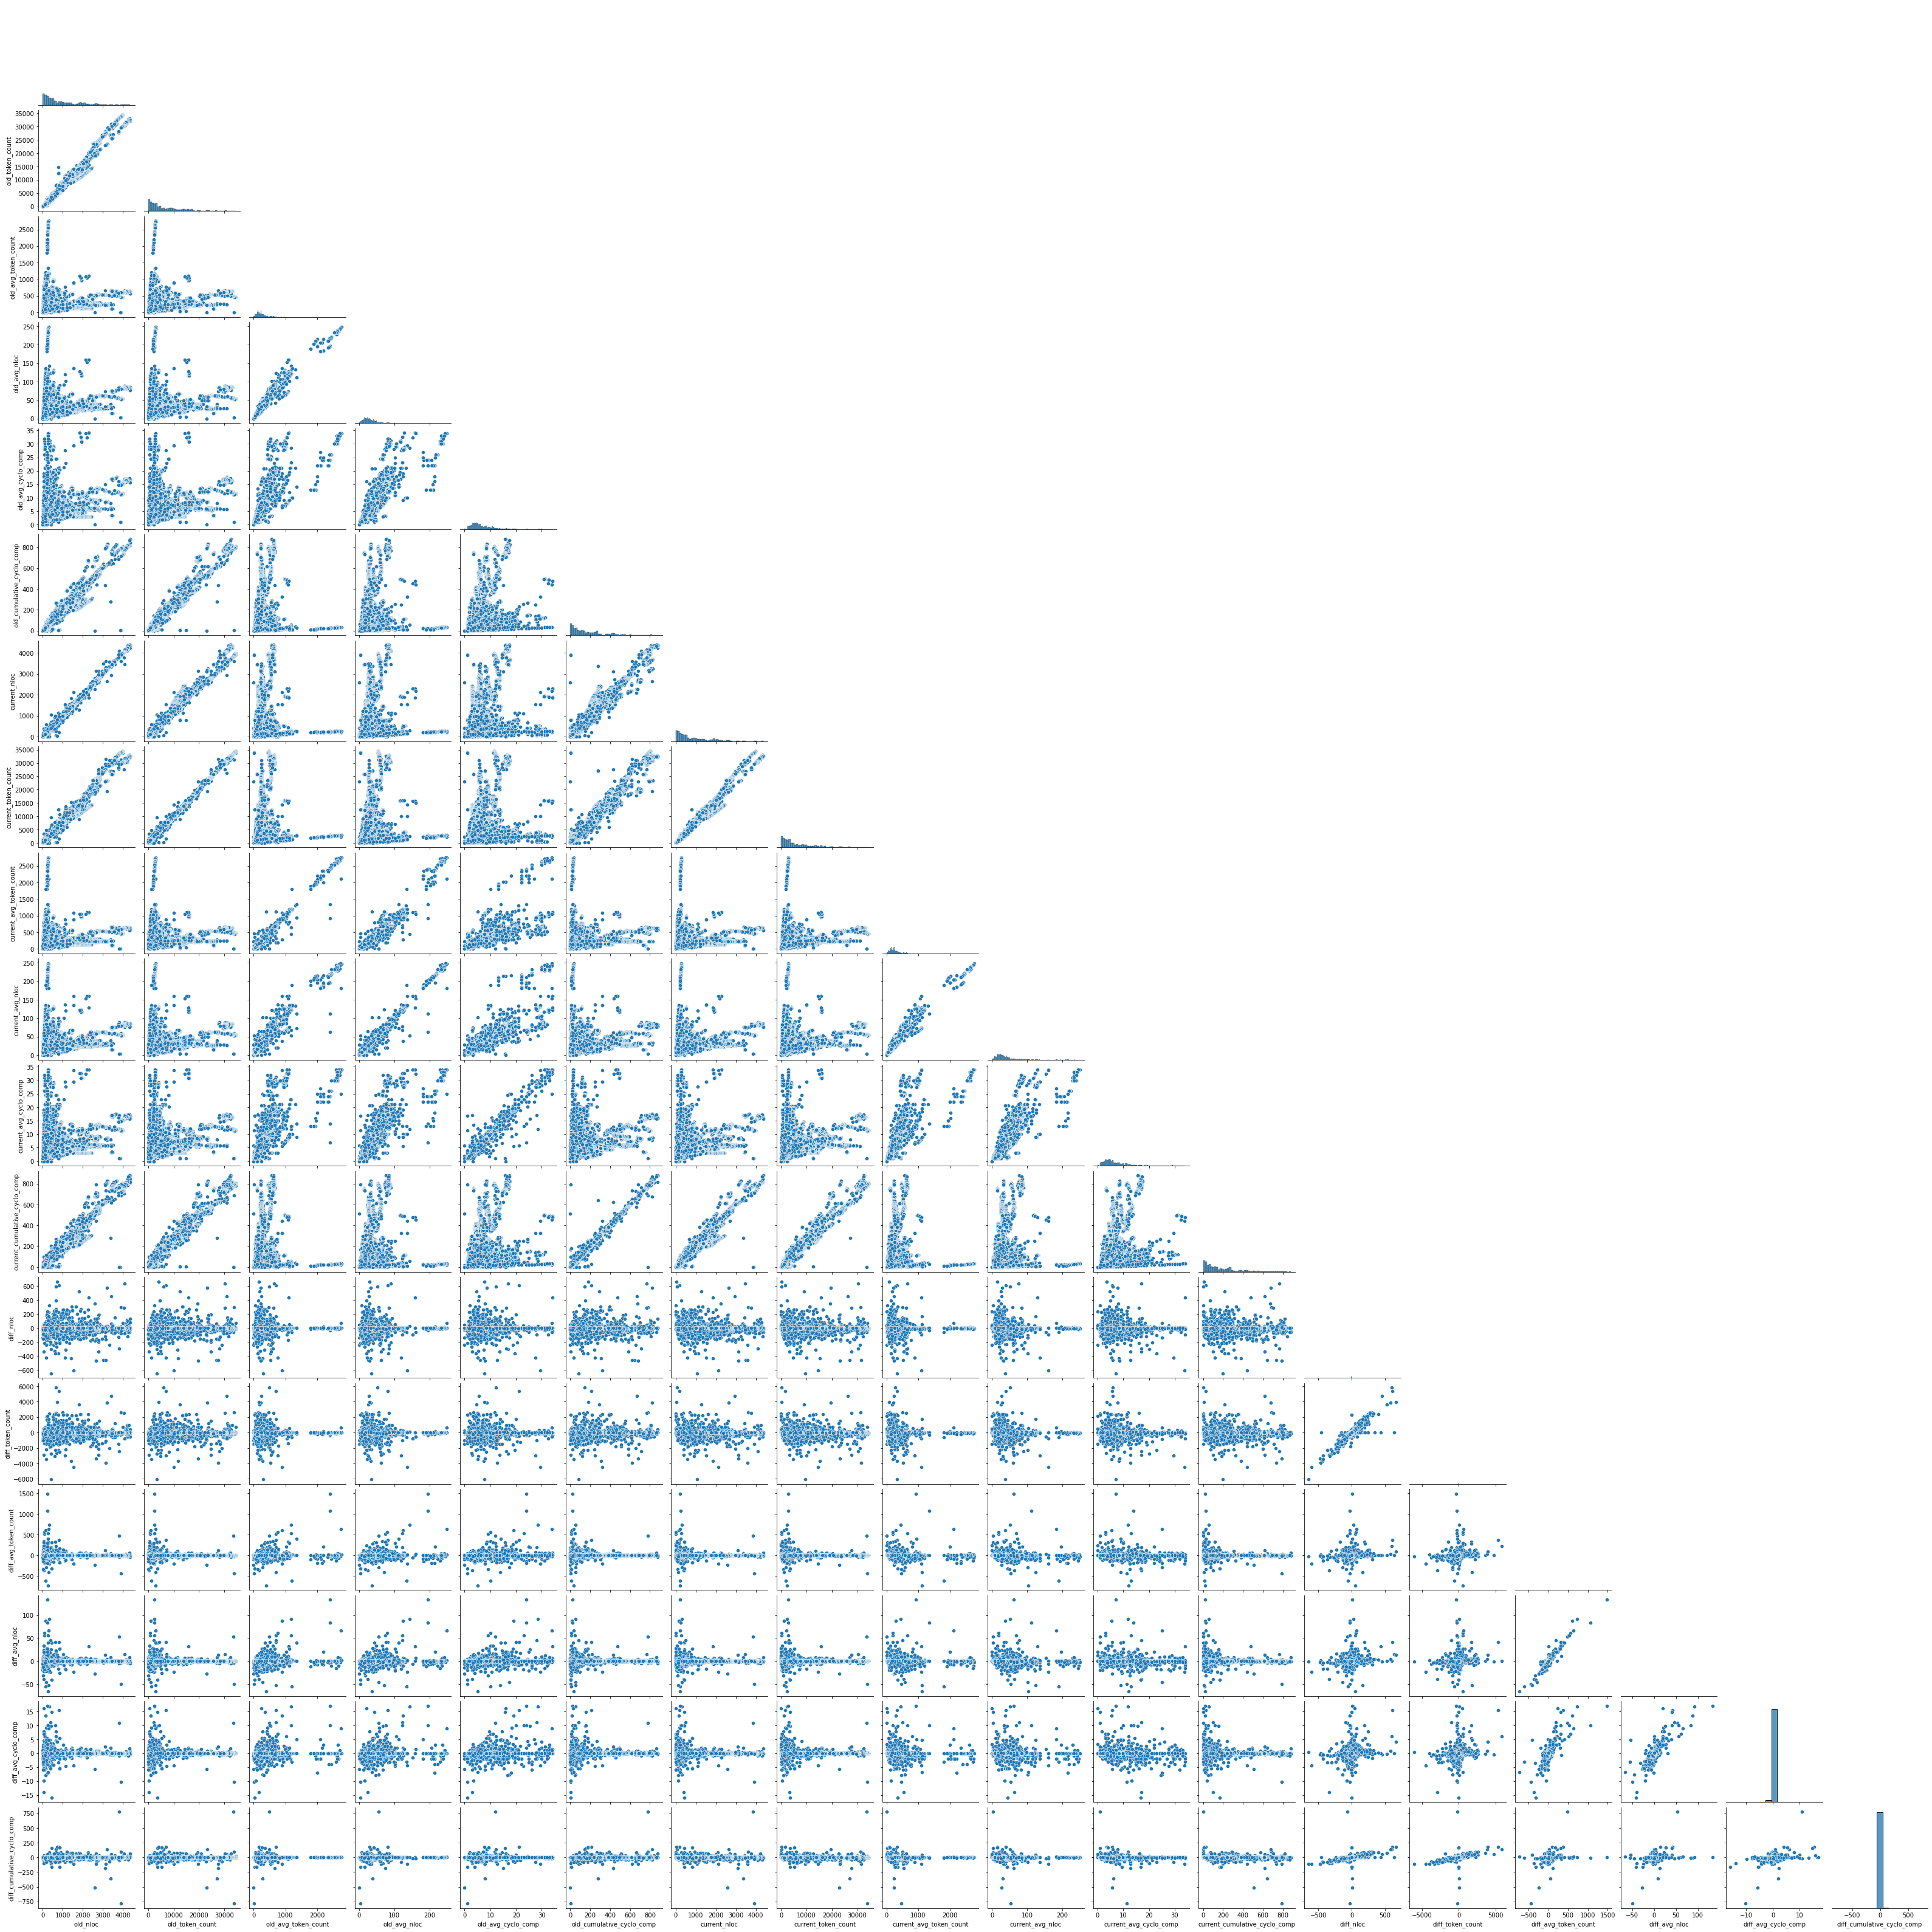

In [3]:
fig = sb.pairplot(file_stats, corner=True)
fig.savefig("pairplot.png",bbox_inches='tight', dpi=600)

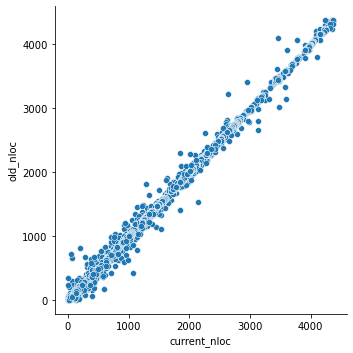

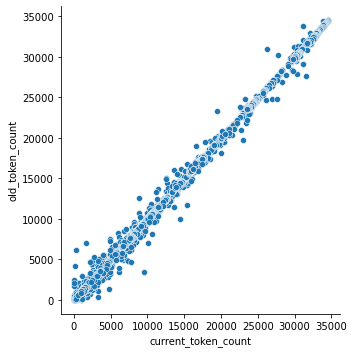

In [14]:

sb.relplot(x=current+"nloc", y=old+"nloc",data=file_stats)
sb.relplot(x=current+"token_count", y=old+"token_count",data=file_stats)

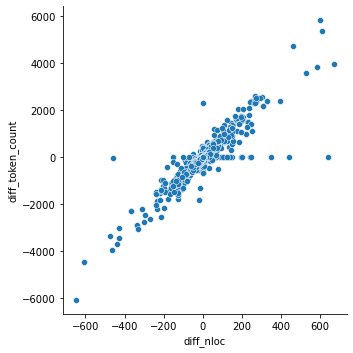

In [30]:
sb.relplot(x="diff_nloc", y="diff_token_count",data=file_stats)


In [25]:
cleaned_diff_nloc = file_stats[(file_stats["diff_nloc"] < 20) & (file_stats["diff_nloc"] > -20)]

<AxesSubplot:xlabel='diff_nloc', ylabel='Count'>

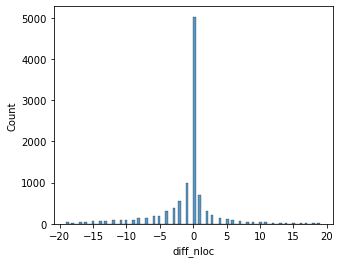

In [26]:
#sb.boxplot(data=file_stats["diff_nloc"])

sb.histplot(data=cleaned_diff_nloc["diff_nloc"], bins=100)

In [29]:
len(file_stats[(file_stats["diff_nloc"] == 3)])

217